# Encoding genes into a binary vector

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
import pickle

## Encoding functions definition

In [2]:
def one_hot_encode(vectors):
    '''
    Converts array of categorical values to one-hot encoded arrays

    !!Automatically detects all unique categories across all input arrays!!

    Parameters:
    - arrays: List of numpy arrays containing categorical features

    Returns:
    - List of one-hot encoded arrays
    '''
    # Get and sort all of the unique values
    values = np.unique(np.concatenate([np.unique(vec) for vec in vectors]))
    # Map the positions to the categories
    values_mapping = {value: idx for idx, value in enumerate(values)}
    mlb = MultiLabelBinarizer(classes = values)

    results = []
    for vec in vectors:
        vec_as_list = [[item] for item in vec]
        encoded = mlb.fit_transform(vec_as_list)
        results.append(encoded.sum(axis=0).tolist())

    # Convert to numpy arrays
    for i in range(len(results)):
        results[i] = np.array(results[i], dtype=int)

    return (results if len(results)>1 else results[0]), values

def plot_encoded_vector(encoded_vector, categories=None, figsize=(10, 1)):
    '''
    Plot a one-hot encoded vector as black/white squares.

    Parameters:
    - encoded_vector: List of binary values (e.g., [1,0,1,1])
    - categories: List of labels
    '''
    data = encoded_vector.reshape(1, -1)

    fig, ax = plt.subplots(figsize=figsize)

    ax.imshow(data, cmap=plt.cm.binary_r, aspect='auto')
    ax.set_yticks([])

    # Add labels if provided
    if categories is not None:
        ax.set_xticks(np.arange(len(encoded_vector)))
        ax.set_xticklabels(categories, rotation=45, ha='right')
    else:
        ax.set_xticks([])
    
    #  Add grid lines between squares
    ax.set_xticks(np.arange(-0.5, len(encoded_vector), 1), minor=True)
    ax.set_yticks([-0.5, 0.5], minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
    
    plt.tight_layout()
    plt.show()

Here we code a very simple example of a 3 species community. This example is just an ilustration to show how the `onde_hot_encode()` function works.

In [3]:
# Example for understanding the one_hot_encode function

x = np.array(['a','g','d'])     # Species 1 genes/pathways
y = np.array(['c','a'])         # Species 2 genes/pathways
z = np.array(['s','d','g','q']) # Species 3 genes/pathways

encoded, mapping = one_hot_encode([x,y,z]) # Encoding function

print('Species genes/pathways')
print(f"x:{x}")
print(f"y:{y}")
print(f"z:{z}\n")
print(f"Labels: {mapping}\n")
print("GR/MR of the species")
print(f"x_enc: {encoded[0]}")
print(f"y_enc: {encoded[1]}")
print(f"z_enc: {encoded[2]}")

Species genes/pathways
x:['a' 'g' 'd']
y:['c' 'a']
z:['s' 'd' 'g' 'q']

Labels: ['a' 'c' 'd' 'g' 'q' 's']

GR/MR of the species
x_enc: [1 0 1 1 0 0]
y_enc: [1 1 0 0 0 0]
z_enc: [0 0 1 1 1 1]


## MR example
The following cells demonstrates the construction of Metabolic Representation (MR) vectors for three bacterial strains:
*   _G. hermandii_ PCC6308
*   _P. taiwanensis_ DSM21245
*   _E. coli_ MG1655

We apply the `one_hot_encode()` function to metabolic pathway lists extracted from BioCyc (saved as `.txt` files). The output is a binary matrix where each row is the MR vector for a strain, indicating the presence or absence of every pathway found across the dataset.

In [4]:
# Import data from CyanoCyc (Methabolic Representation)
synPCC6308_path_df = pd.read_csv("All-pathways-of-G.-herdmanii-PCC-6308.txt")
psDSM21245_path_df = pd.read_csv("All-pathways-of-P.-taiwanensis-DSM-21245.txt")
ecoliK12_path_df = pd.read_csv("All-pathways-of-E.-coli-K-12-substr.-MG1655.txt")

In [ ]:
# Applied to the pathways in bacterias
encoded_bact, pathways = one_hot_encode([synPCC6308_path_df.to_numpy().reshape(-1,),
                                         psDSM21245_path_df.to_numpy().reshape(-1,),
                                         ecoliK12_path_df.to_numpy().reshape(-1,)])
encoded_bac_np = np.array(encoded_bact)

In [13]:
print(f"The encoded matrix of the community has {encoded_bac_np.shape[0]} rows (species) and {encoded_bac_np.shape[1]} columns (pathways)")

The encoded matrix of the community has 3 rows (species) and 639 columns (pathways)


Display of a slice of the MR of G. hermandii PCC6308


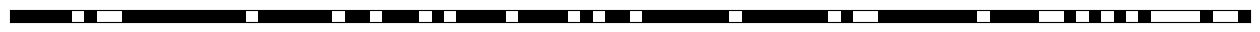

In [ ]:
print("Display of a slice of the MR of G. hermandii PCC6308:")
plt.matshow(encoded_bact[0].reshape(1,-1)[:,100:200], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

Display of a slice of the whole MR matrix of all the digitalized bacteria:


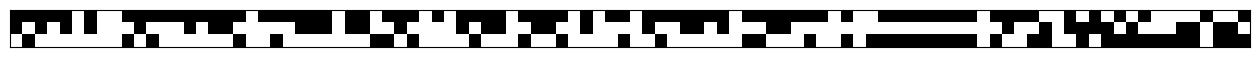

In [15]:
print("Display of a slice of the whole MR matrix of all the digitalized bacteria:")

plt.matshow(encoded_bac_np[:,100:200], cmap='gray')

plt.xticks([])
plt.yticks([])
plt.show()